# Bank Churners Analysis

In [ ]:
pip install dataprep

In [ ]:
pip install shap

In [ ]:
import pandas as pd
import numpy as np
# import statsmodels.api as sm
import matplotlib.pyplot  as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.model_selection import cross_val_score
from collections import Counter
# from dataprep.eda import *
from sklearn.feature_selection import SelectFromModel
import shap
%matplotlib inline

C:\Users\kevin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\kevin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\kevin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\kevin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

## Data Import

In [ ]:
# Import Data
data = pd.read_csv("BankChurners.csv")
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
data = data.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
          'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis = 1)

In [ ]:
data.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

## EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
Attrition_Flag              10127 non-null object
Customer_Age                10127 non-null int64
Gender                      10127 non-null object
Dependent_count             10127 non-null int64
Education_Level             10127 non-null object
Marital_Status              10127 non-null object
Income_Category             10127 non-null object
Card_Category               10127 non-null object
Months_on_book              10127 non-null int64
Total_Relationship_Count    10127 non-null int64
Months_Inactive_12_mon      10127 non-null int64
Contacts_Count_12_mon       10127 non-null int64
Credit_Limit                10127 non-null float64
Total_Revolving_Bal         10127 non-null int64
Avg_Open_To_Buy             10127 non-null float64
Total_Amt_Chng_Q4_Q1        10127 non-null float64
Total_Trans_Amt             10127 non-null int64
Total_Trans_Ct              10127 non-null int

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


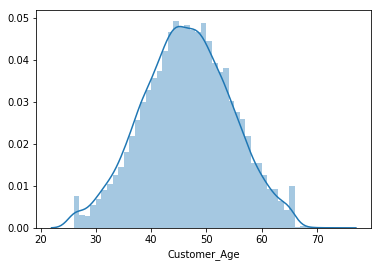

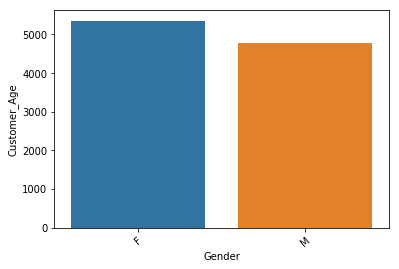

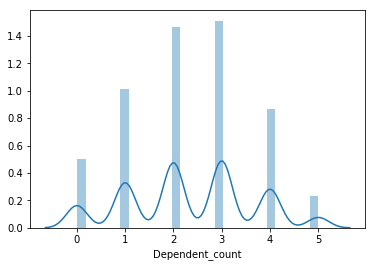

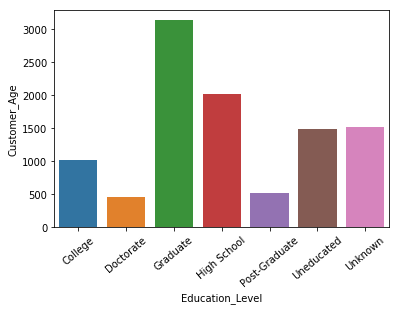

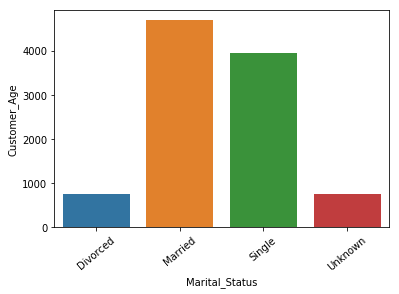

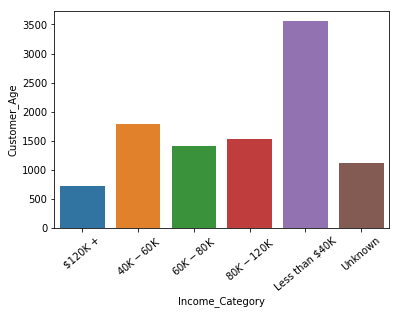

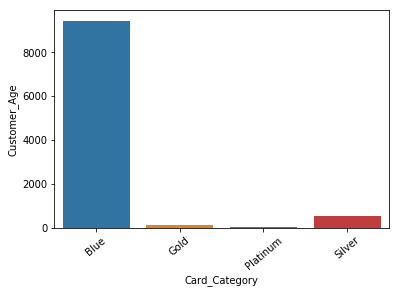

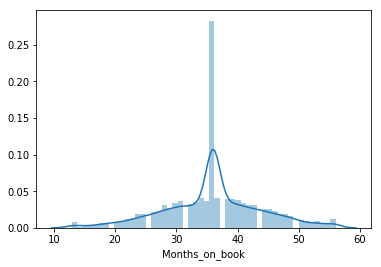

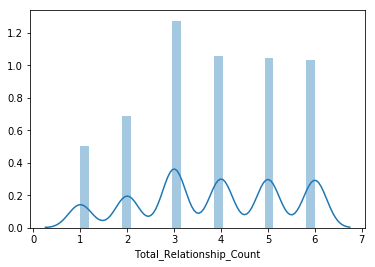

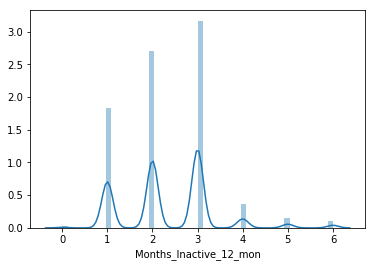

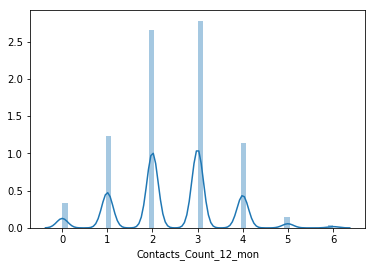

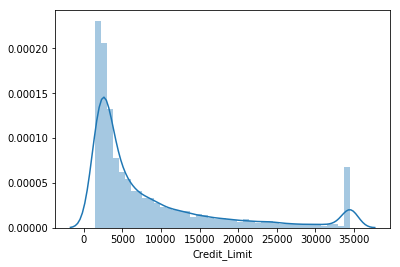

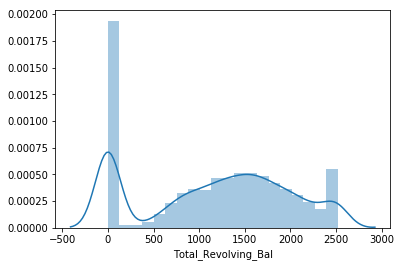

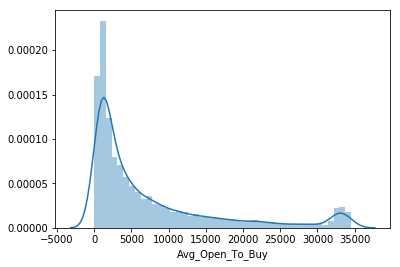

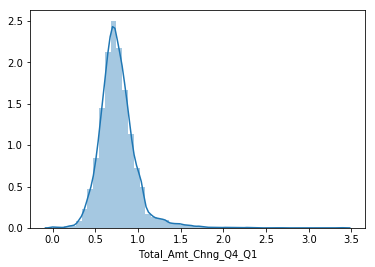

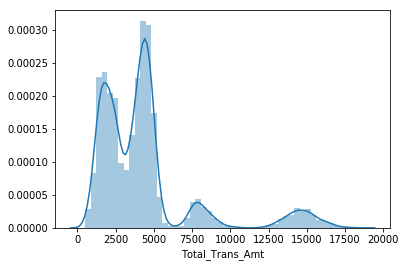

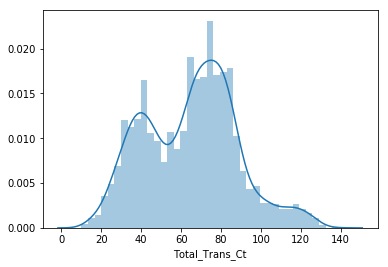

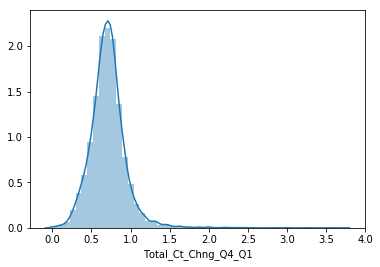

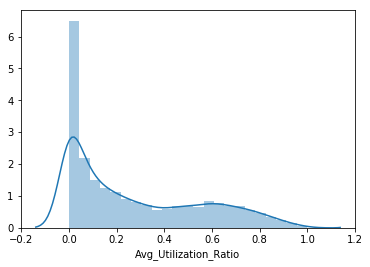

In [ ]:
# Separating Data
X = data.drop('Attrition_Flag', axis=1)
y = data['Attrition_Flag']

for col in X.columns.tolist():
    if X[col].dtypes == 'object':
        for_barplot = X.groupby(col).count()
        sns.barplot(for_barplot.index, for_barplot['Customer_Age'])
        plt.xticks(rotation=40)
        plt.show()
    else:
        sns.distplot(X[col])
        plt.show()

In [ ]:
# Find Categorical Data
categoriacal = data.select_dtypes(include='object')
for col in categoriacal.columns:
    print(categoriacal[col].unique()) # to print categories name only

['Existing Customer' 'Attrited Customer']
['M' 'F']
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
['Married' 'Single' 'Unknown' 'Divorced']
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
['Blue' 'Gold' 'Silver' 'Platinum']


# Categorical Data Transformation

In [ ]:
data.Attrition_Flag.replace({'Existing Customer': 0, 'Attrited Customer': 1}, inplace=True)
data.Gender.replace({'F': 0, 'M': 1}, inplace=True)
data.Education_Level.replace({'Uneducated': 0, 'High School': 1, 'College': 2, 'Graduate': 3, 'Post-Graduate': 4, 'Doctorate': 5, 'Unknown': 6}, inplace=True)
data.Marital_Status.replace({'Married': 0, 'Single': 1, 'Divorced': 2 ,'Unknown': 3}, inplace=True)
data.Income_Category.replace({'Less than $40K': 0, '$40K - $60K': 1, '$60K - $80K': 2, '$80K - $120K' : 3, '$120K +': 4, 'Unknown': 5}, inplace=True)
data.Card_Category.replace({'Blue': 0, 'Silver': 1,'Gold':2,'Platinum':3}, inplace=True)

In [ ]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,1,3,1,0,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,0,5,3,1,0,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,1,3,3,0,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,0,4,1,3,0,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,1,3,0,0,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# Train Test Split

In [ ]:
# Separating data again now that we've transformed the categorical variables
X = data.drop('Attrition_Flag', axis=1)
y = data['Attrition_Flag']

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 42)

In [ ]:
# Splitting the data evenly
X_train_over, y_train_over = SMOTE().fit_resample(X_train, y_train)
Counter(y_train_over)

Counter({0: 5699, 1: 5699})

# Logistic Regression

In [ ]:
categorical_cols = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
numerical_categorical_cols = [ 'Dependent_count','Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']
log_cols = ['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Avg_Utilization_Ratio']
sqrt_cols = ['Total_Revolving_Bal']
other_cols = ['Customer_Age', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']
transform_x = X.copy()

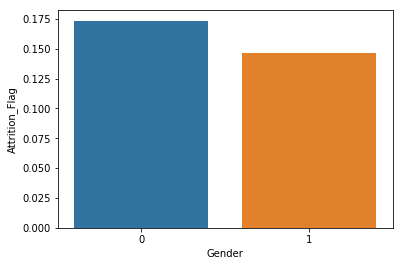

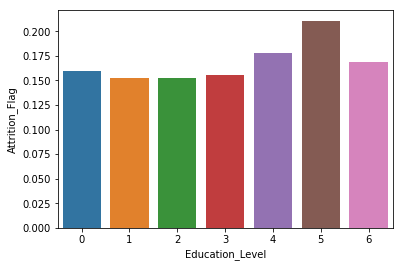

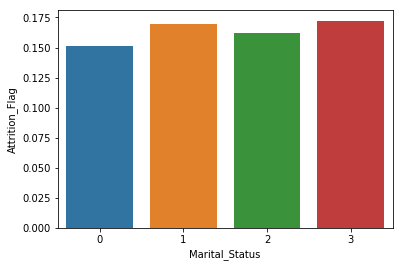

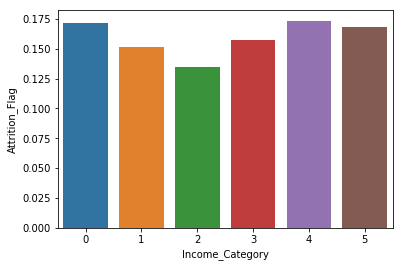

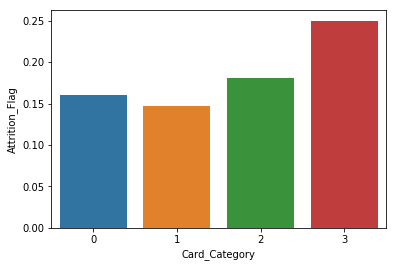

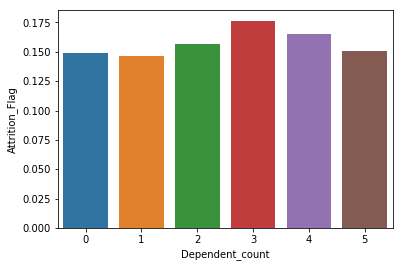

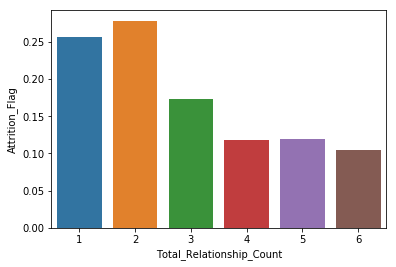

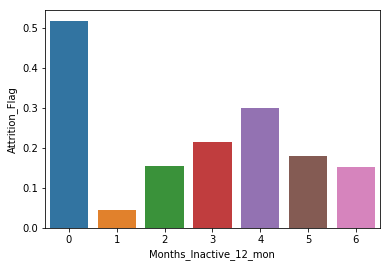

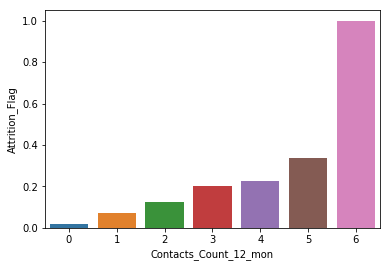

In [ ]:
# Checking the distributions of the categorical variables 
# and any numerical variables that are sparse enough to treat as categorical

for col in categorical_cols+numerical_categorical_cols:
    for_barplot = data.groupby(col).mean()
    sns.barplot(for_barplot.index, for_barplot['Attrition_Flag'])
    plt.show()

In [ ]:
categorical_dummy_cols = []
numerical_categorical_dummy_cols = []
numerical_transform_cols = ['Sqrt_Total_Revolving_Bal']

for col in categorical_cols:
    categories = data.groupby(col).count().index.tolist()
    dummy_cols = pd.DataFrame()
    for category in categories[1:]:
        dummy_cols[f"{col}_{category}"] = [1 if value == category else 0 for value in data[col]]
        categorical_dummy_cols.append(f"{col}_{category}")
    transform_x = transform_x.merge(dummy_cols, left_index=True, right_index=True)

for col in numerical_categorical_cols:
    categories = data.groupby(col).count().index.tolist()
    dummy_cols = pd.DataFrame()
    for category in categories[1:]:
        dummy_cols[f"{col}_{category}"] = [1 if value == category else 0 for value in data[col]]
        numerical_categorical_dummy_cols.append(f"{col}_{category}")
    transform_x = transform_x.merge(dummy_cols, left_index=True, right_index=True)

for col in log_cols:
    transform_x[f"Log_{col}"] = np.log(data[col]+1)
    numerical_transform_cols.append(f"Log_{col}")

transform_x['Sqrt_Total_Revolving_Bal'] = np.sqrt(data['Total_Revolving_Bal'])

base_x = transform_x[other_cols+log_cols+sqrt_cols+numerical_categorical_cols+categorical_dummy_cols].copy()
numeric_categorical_x = transform_x[other_cols+log_cols+sqrt_cols+
                                    numerical_categorical_dummy_cols+categorical_dummy_cols].copy()
numeric_transform_x = transform_x[other_cols+numerical_transform_cols+
                                    numerical_categorical_cols+categorical_dummy_cols].copy()
full_transform_x = transform_x[other_cols+numerical_transform_cols+
                                    numerical_categorical_dummy_cols+categorical_dummy_cols].copy()

In [ ]:
# Splitting the data specifically for logistic regression, but using the same indices
# We're splitting the data separately because we don't want to change the original dataset until we see how the transformations
# perform in predictions.

train_indices = X_train.index.tolist()
test_indices = X_test.index.tolist()
y_train = [y[i] for i in train_indices]
y_test = [y[i] for i in test_indices]

In [ ]:
# This model just regresses on the original data (no transformations, except for the dummy variables)

x_train_base = base_x.iloc[train_indices]
x_test_base = base_x.iloc[test_indices]

base_model = LogisticRegressionCV(penalty='l1', solver='liblinear')
base_model.fit(x_train_base, y_train)

base_model.score(x_test_base, y_test)

0.8985637342908438

In [ ]:
confusion_matrix(y_test, base_model.predict(x_test_base))

array([[2707,   94],
       [ 245,  296]], dtype=int64)

In [ ]:
print(classification_report(y_test, base_model.predict(x_test_base)))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2801
           1       0.76      0.55      0.64       541

    accuracy                           0.90      3342
   macro avg       0.84      0.76      0.79      3342
weighted avg       0.89      0.90      0.89      3342



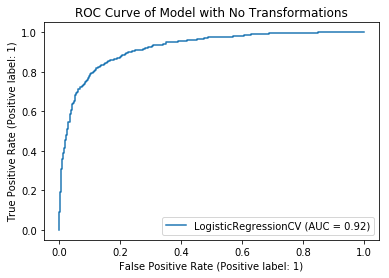

In [ ]:
plot_roc_curve(base_model, x_test_base, y_test)
plt.title("ROC Curve of Model with No Transformations")
plt.show()

In [ ]:
# This model just regresses on the data when some of the sparse numerical variables are treated as categorical

x_train_nc = numeric_categorical_x.iloc[train_indices]
x_test_nc = numeric_categorical_x.iloc[test_indices]

num_cat_model = LogisticRegressionCV(penalty='l1', solver='liblinear')
num_cat_model.fit(x_train_nc, y_train)

num_cat_model.score(x_test_nc, y_test)

0.9078396169958108

In [ ]:
confusion_matrix(y_test, num_cat_model.predict(x_test_nc))

array([[2706,   95],
       [ 213,  328]], dtype=int64)

In [ ]:
print(classification_report(y_test, num_cat_model.predict(x_test_nc)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2801
           1       0.78      0.61      0.68       541

    accuracy                           0.91      3342
   macro avg       0.85      0.79      0.81      3342
weighted avg       0.90      0.91      0.90      3342



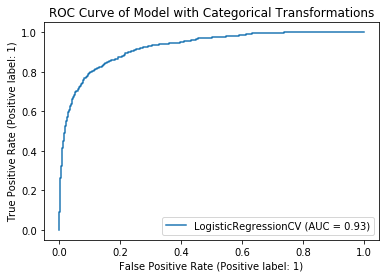

In [ ]:
plot_roc_curve(num_cat_model, x_test_nc, y_test)
plt.title("ROC Curve of Model with Categorical Transformations")
plt.show()

In [ ]:
# This model regresses on the transformed numeric variables (log transforms and one square root transform)
# This data keeps the sparse numeric variables as numeric

x_train_nt = numeric_transform_x.iloc[train_indices]
x_test_nt = numeric_transform_x.iloc[test_indices]

num_tran_model = LogisticRegressionCV(penalty='l1', solver='liblinear')
num_tran_model.fit(x_train_nt, y_train)

num_tran_model.score(x_test_nt, y_test)

0.9168162776780371

In [ ]:
confusion_matrix(y_test, num_tran_model.predict(x_test_nt))

array([[2724,   77],
       [ 201,  340]], dtype=int64)

In [ ]:
print(classification_report(y_test, num_tran_model.predict(x_test_nt)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2801
           1       0.82      0.63      0.71       541

    accuracy                           0.92      3342
   macro avg       0.87      0.80      0.83      3342
weighted avg       0.91      0.92      0.91      3342



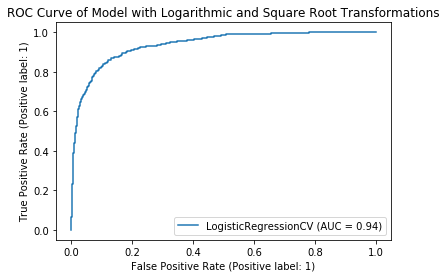

In [ ]:
plot_roc_curve(num_tran_model, x_test_nt, y_test)
plt.title("ROC Curve of Model with Logarithmic and Square Root Transformations")
plt.show()

In [ ]:
# This model regresses on the fully transformed data (categorical transform, log transforms, and one square root transform)

x_train_ft = full_transform_x.iloc[train_indices]
x_test_ft = full_transform_x.iloc[test_indices]

full_tran_model = LogisticRegressionCV(penalty='l1', solver='liblinear')
full_tran_model.fit(x_train_ft, y_train)

full_tran_model.score(x_test_ft, y_test)

0.917115499700778

In [ ]:
confusion_matrix(y_test, full_tran_model.predict(x_test_ft))

array([[2708,   93],
       [ 184,  357]], dtype=int64)

In [ ]:
print(classification_report(y_test, full_tran_model.predict(x_test_ft)))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      2801
           1       0.79      0.66      0.72       541

    accuracy                           0.92      3342
   macro avg       0.86      0.81      0.84      3342
weighted avg       0.91      0.92      0.91      3342



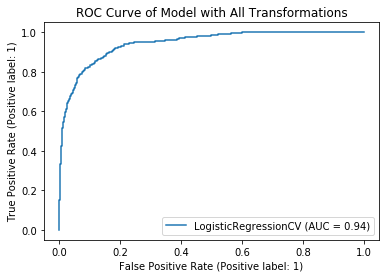

In [ ]:
plot_roc_curve(full_tran_model, x_test_ft, y_test)
plt.title("ROC Curve of Model with All Transformations")
plt.show()

In [ ]:
# This model regresses using transformed variables and interaction between all variables
# First, we have to create the interaction terms

new_x = full_transform_x

interaction = new_x.copy()
independents = new_x.columns.tolist()

for col1 in independents:
    for col2 in independents:
        if independents.index(col1) < independents.index(col2):
            col_name = col1 + "_" + col2
            interaction[col_name] = interaction[col1]*interaction[col2]

x_train_int = interaction.iloc[train_indices]
x_test_int = interaction.iloc[test_indices]

interaction_model = LogisticRegressionCV(penalty='l1', solver='liblinear')
interaction_model.fit(x_train_int, y_train)

interaction_model.score(x_test_int, y_test)

0.9242968282465589

In [ ]:
confusion_matrix(y_test, interaction_model.predict(x_test_int))

array([[2720,   81],
       [ 172,  369]], dtype=int64)

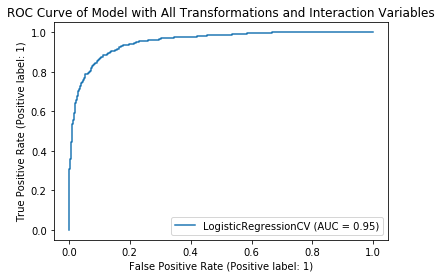

In [ ]:
plot_roc_curve(interaction_model, x_test_int, y_test)
plt.title("ROC Curve of Model with All Transformations and Interaction Variables")
plt.show()

In [ ]:
print(classification_report(y_test, interaction_model.predict(x_test_int)))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      2801
           1       0.82      0.68      0.74       541

    accuracy                           0.92      3342
   macro avg       0.88      0.83      0.85      3342
weighted avg       0.92      0.92      0.92      3342



In [ ]:
# Now we can save the model coefficients to see which were selected by Lasso regularization

models = {
    "base": {
        "variables": base_x.columns.tolist(),
        "coeffs": base_model.coef_[0]
    },
    "numbers_as_categories": {
        "variables": numeric_categorical_x.columns.tolist(),
        "coeffs": num_cat_model.coef_[0]
    },
    "numbers_transformed": {
        "variables": numeric_transform_x.columns.tolist(),
        "coeffs": num_tran_model.coef_[0]
    },
    "full_transformation": {
        "variables": full_transform_x.columns.tolist(),
        "coeffs": full_tran_model.coef_[0]
    },
    "interaction_model": {
        "variables": interaction.columns.tolist(),
        "coeffs": interaction_model.coef_[0]
    }
}

for model in models.keys():
    quick_df = pd.DataFrame({"Variable":models[model]["variables"], "Coefficients":models[model]["coeffs"]})
    quick_df = quick_df.loc[quick_df["Coefficients"] > 0]
    quick_df.to_csv(f"{model}.csv", index=False)

# KNN

In [ ]:
# The numerical transformations were helpful, so we'll finalize them in the data
# For the following models, we'll treat all numerical variables as numerical, to keep things simple

data['Credit_Limit'] = np.log(data['Credit_Limit']+1)
data['Avg_Open_To_Buy'] = np.log(data['Avg_Open_To_Buy']+1)
data['Avg_Utilization_Ratio'] = np.log(data['Avg_Utilization_Ratio']+1)
data['Total_Revolving_Bal'] = np.sqrt(data['Total_Revolving_Bal'])
data['Total_Trans_Amt'] = np.log(data['Total_Trans_Amt']+1)

In [ ]:
# Splitting Data  - Redoing this part for knn before applying any transformations.
X = data.drop('Attrition_Flag', axis=1)
y = data['Attrition_Flag']

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 42)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

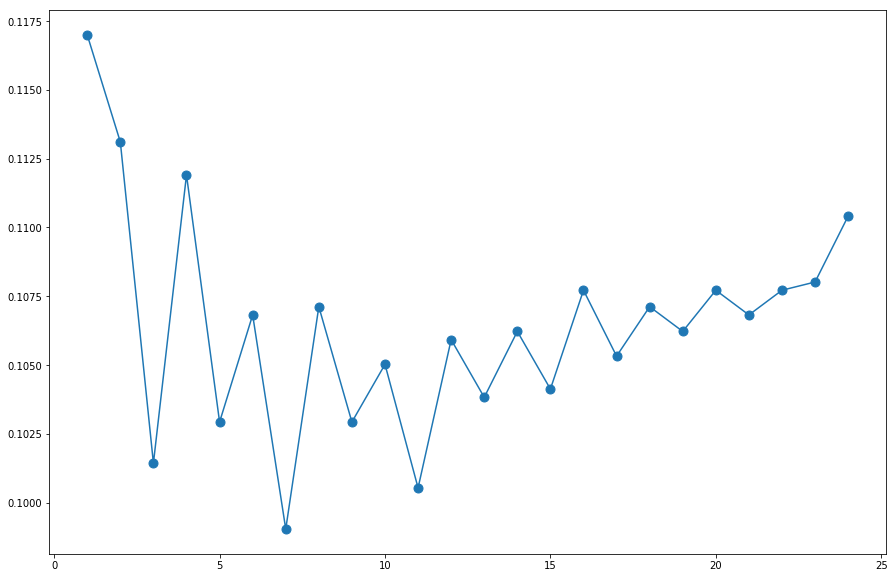

In [ ]:
error_rate = []

for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    pred = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(15,10))
plt.plot(range(1,25),error_rate, marker='o', markersize=9)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train_scaled, y_train)

y_pred = classifier.predict(X_test_scaled)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2762   39]
 [ 318  223]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      2801
           1       0.85      0.41      0.56       541

    accuracy                           0.89      3342
   macro avg       0.87      0.70      0.75      3342
weighted avg       0.89      0.89      0.88      3342



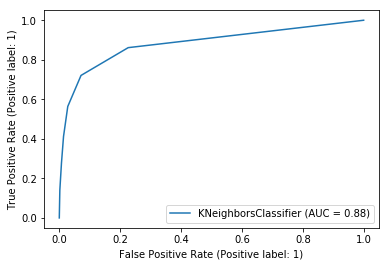

In [ ]:
plot_roc_curve(classifier, X_test_scaled, y_test)

In [ ]:
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.72408687 0.88548865 0.91160494 0.9254321  0.85185185]
cv_scores mean:0.8596928814302951


# Random Forest

## With Oversampling

In [ ]:
def roc_auc_plot(fpr, tpr, roc_auc):
    plt.figure()
    plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Rfc_ROC')
    plt.show()

=============Confusion Matrix=============
[[2191  610]
 [ 109  432]]


=============Key Metrics==================
              precision    recall  f1-score   support

           0       0.95      0.78      0.86      2801
           1       0.41      0.80      0.55       541

    accuracy                           0.78      3342
   macro avg       0.68      0.79      0.70      3342
weighted avg       0.87      0.78      0.81      3342

=============ROC AUC======================


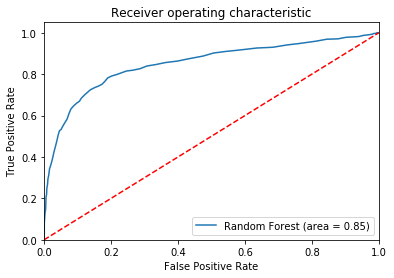

AUC: 0.8499892103493537
Accuracy score for test data : 0.7848593656493118
Accuracy score for train data : 1.0


In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train_over, y_train_over)
y_pred = rfc.predict(X_test)
y_prob = rfc.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
y_pred_train_rf = rfc.predict(X_train_over)
rf_as = metrics.accuracy_score(y_test, y_pred)
rf_as_train = metrics.accuracy_score(y_train_over, y_pred_train_rf)


print("=============Confusion Matrix=============")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=============Key Metrics==================")
print(classification_report(y_test, y_pred))
print("=============ROC AUC======================")
roc_auc_plot(fpr, tpr, roc_auc) 
print('AUC:', roc_auc)
print(f"Accuracy score for test data : {rf_as}")
print(f"Accuracy score for train data : {rf_as_train}")

## Without Oversampling

=============Confusion Matrix=============
[[2767   34]
 [  88  453]]


=============Key Metrics==================
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2801
           1       0.93      0.84      0.88       541

    accuracy                           0.96      3342
   macro avg       0.95      0.91      0.93      3342
weighted avg       0.96      0.96      0.96      3342

=============ROC AUC======================


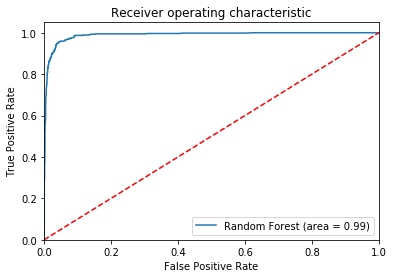

AUC: 0.9887213505079055
Accuracy score for test data : 0.9634949132256134
Accuracy score for train data : 1.0


In [ ]:
rfc = RandomForestClassifier(bootstrap=False, max_depth= 60, max_features = 'auto', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 1000).fit(X_train, y_train)
y_pred = rfc.predict(X_test)
y_prob = rfc.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
y_pred_train_rfc = rfc.predict(X_train)
rfc_as = metrics.accuracy_score(y_test, y_pred)
rfc_as_train = metrics.accuracy_score(y_train, y_pred_train_rfc)


print("=============Confusion Matrix=============")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=============Key Metrics==================")
print(classification_report(y_test, y_pred))
print("=============ROC AUC======================")
roc_auc_plot(fpr, tpr, roc_auc) 
print('AUC:', roc_auc)
print(f"Accuracy score for test data : {rfc_as}")
print(f"Accuracy score for train data : {rfc_as_train}")

In [ ]:
feature_importances = pd.DataFrame(rfc.feature_importances_, index = X.columns, columns=['Importance']).sort_values('Importance', ascending=False)
print(feature_importances)

                          Importance
Total_Trans_Amt             0.202639
Total_Trans_Ct              0.175508
Total_Revolving_Bal         0.104781
Total_Ct_Chng_Q4_Q1         0.104387
Total_Relationship_Count    0.064259
Avg_Utilization_Ratio       0.063372
Total_Amt_Chng_Q4_Q1        0.060502
Customer_Age                0.035472
Credit_Limit                0.031323
Avg_Open_To_Buy             0.028628
Contacts_Count_12_mon       0.026327
Months_Inactive_12_mon      0.025995
Months_on_book              0.024865
Dependent_count             0.011433
Education_Level             0.010341
Gender                      0.010003
Income_Category             0.009310
Marital_Status              0.008787
Card_Category               0.002066


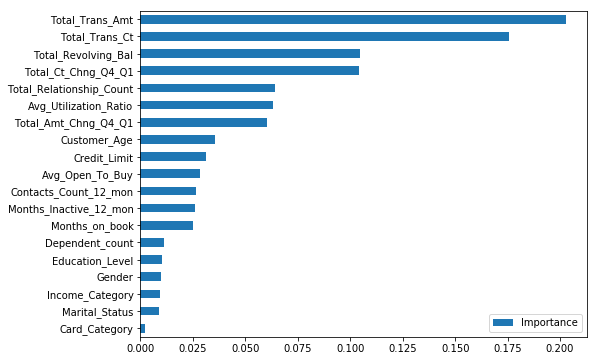

In [ ]:
ax = feature_importances.plot.barh(figsize=(8,6))
ax.invert_yaxis()

## Random Forest Feature Selection

In [ ]:
rf = RandomForestClassifier().fit(X_train, y_train)
sel = SelectFromModel(rf)
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [ ]:
sel.get_support()

array([False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False,  True,  True,  True,  True,
        True])

In [ ]:
selected_feat = X_train.columns[(sel.get_support())]
print(selected_feat)

Index(['Total_Relationship_Count', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


## After Feature Selection model

In [ ]:
# After feature selection by running the base model
# Splitting Data
data1 = data[['Total_Relationship_Count', 'Total_Revolving_Bal',
             'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
             'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Attrition_Flag']]

X1 = data1.drop('Attrition_Flag', axis=1)
y1 = data1['Attrition_Flag']

# Split train and test data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = .33, random_state = 42)

=============Confusion Matrix=============
[[2747   54]
 [  86  455]]


=============Key Metrics==================
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2801
           1       0.89      0.84      0.87       541

    accuracy                           0.96      3342
   macro avg       0.93      0.91      0.92      3342
weighted avg       0.96      0.96      0.96      3342

=============ROC AUC======================


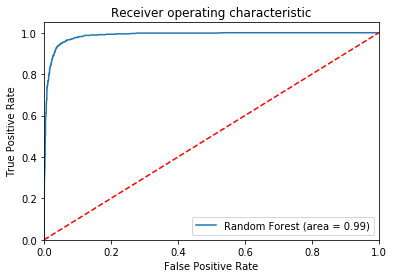

AUC: 0.9867854826075452
Accuracy score for test data : 0.9581089168162776
Accuracy score for train data : 1.0


In [ ]:
rfc = RandomForestClassifier(bootstrap=True, max_depth= 120, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 1000).fit(X1_train, y1_train)
y1_pred = rfc.predict(X1_test)
y1_prob = rfc.predict_proba(X1_test)[:,1]
roc_auc = roc_auc_score(y1_test, y1_prob)
fpr, tpr, thresholds = roc_curve(y1_test, y1_prob)
y1_pred_train_rfc = rfc.predict(X1_train)
rfc_as = metrics.accuracy_score(y1_test, y1_pred)
rfc_as_train = metrics.accuracy_score(y1_train, y1_pred_train_rfc)


print("=============Confusion Matrix=============")
print(confusion_matrix(y1_test, y1_pred))
print('\n')
print("=============Key Metrics==================")
print(classification_report(y1_test, y1_pred))
print("=============ROC AUC======================")
roc_auc_plot(fpr, tpr, roc_auc) 
print('AUC:', roc_auc)
print(f"Accuracy score for test data : {rfc_as}")
print(f"Accuracy score for train data : {rfc_as_train}")

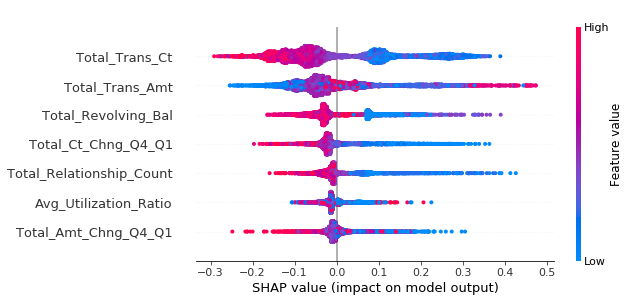

In [ ]:
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X1_train)
shap.summary_plot(shap_values[1], X1_train)

In [ ]:
top_features = ['Total_Trans_Ct', 'Total_Trans_Amt', 'Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1']

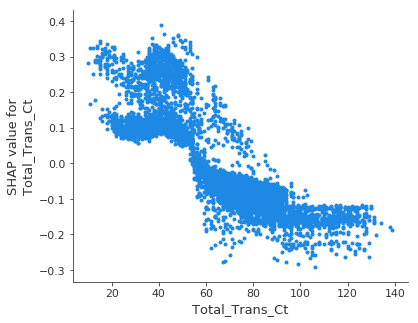

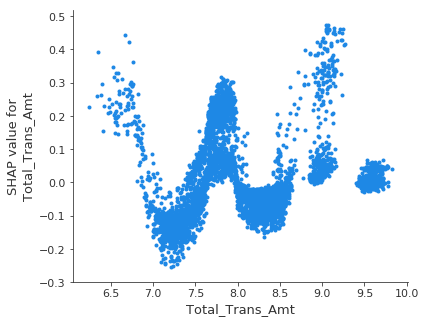

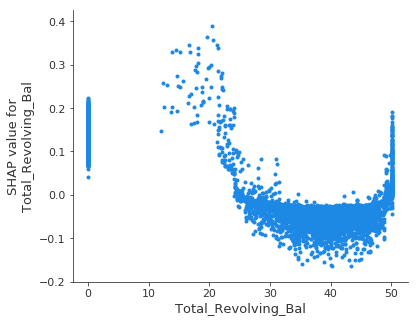

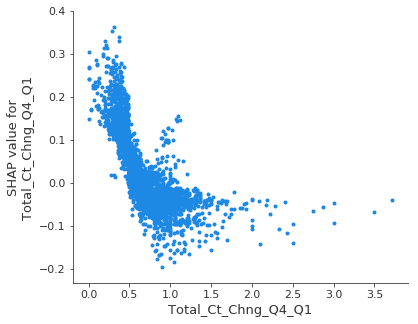

In [ ]:
for feature in top_features:
    shap.dependence_plot(feature, shap_values[1], X1_train, interaction_index=None)

## Parameter Tuning

In [ ]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rfc.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 120,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state = 42, n_jobs = -1, scoring = 'roc_auc')
# Fit the random search model
rf_random.fit(X1_train, y1_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': True}

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [100, 110, 120],
    'max_features': ['sqrt'],
    'min_samples_leaf': [0.5, 1, 1.5],
    'min_samples_split': [1, 2, 3],
    'n_estimators': [900, 1000, 1100]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring = 'roc_auc',
                           cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X1_train, y1_train)
grid_search.best_params_

Fitting 3 folds for each of 81 candidates, totalling 243 fits
